<a href="https://colab.research.google.com/github/pedrocgr/deep-learning-competition/blob/main/mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Datasets/MobilePrice/train.csv') # Pegando o dataframe de teste e treino
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/MobilePrice/test.csv') # o de teste é usada para competição no kaggle

'''Classificação de dispositivos móveis em diferentes faixas de preço usando várias características desses dispositivos (como bateria, clock, etc.)
para determinar a qual faixa de preço eles pertencem. Trata-se de um problema de classificação.'''

df.head()

Mounted at /content/drive


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print(df.columns)  # Vendo as features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Não há nenhuma entidade duplicada
print(df.duplicated().sum())

0


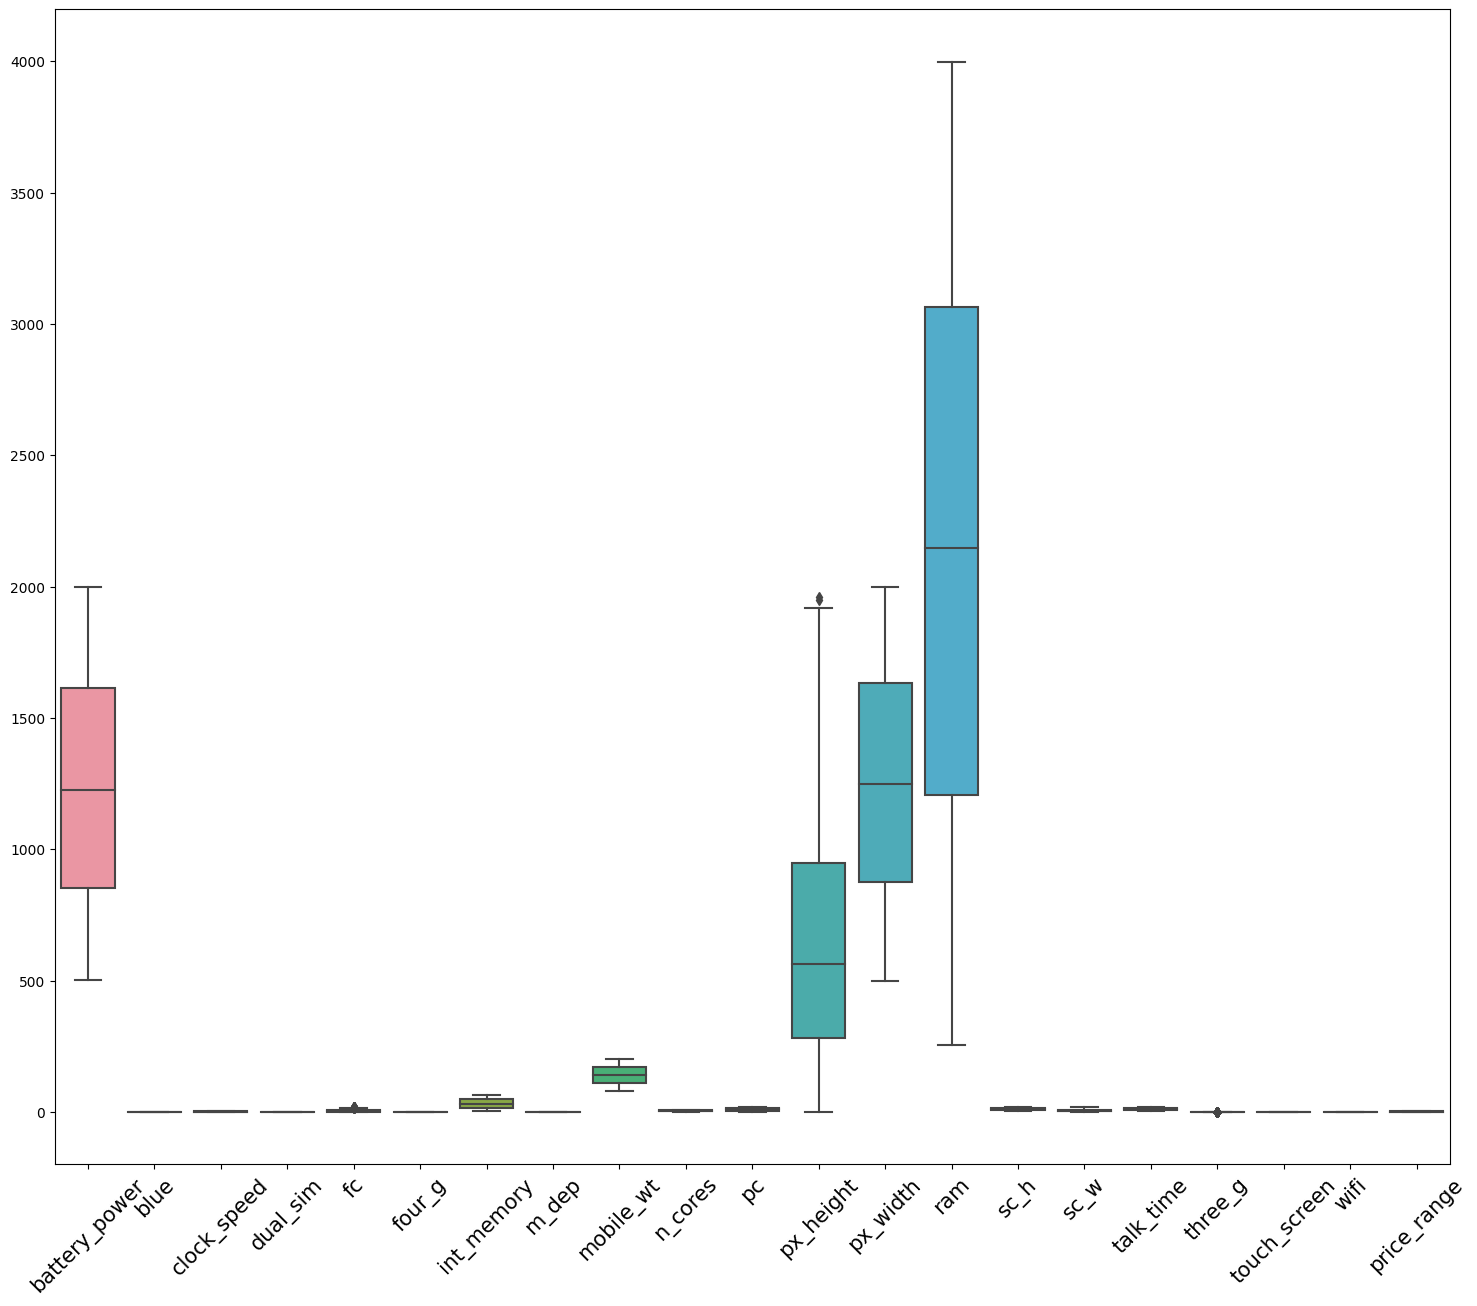

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para cada coluna numérica

plt.figure(figsize=(18,15))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate labels to 45 degrees
plt.tick_params(axis='x', which='major', labelsize=15)  # Decrease font size
plt.show()

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).all(axis=1)
df_outliers = df[outliers]
print(df_outliers)

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


Como estamos com saída "Empty DataFrame" significa que não houve nenhuma feature com z_score maior que 3. Sendo assim não há outliers tão extremos no dataset, facilitando o treinamento do modelo.

# Criando uma Rede Neural Simples


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Pré Processamento dos dados
X = df.drop(['price_range'], axis=1).values
y = df['price_range'].values

# Dividindo os dados do DF em teste e treino 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construindo o modelo da Rede Neural
model = Sequential()

# Camadas
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # assumindo 4 classes no price_range

# Compilar o modelo com o learning_rate modificado
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.002), metrics=['accuracy'])

# Tecnica de Early Stoppin para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Validando os resultados
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão Rede Neural: {accuracy}")

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 1.1460 - accuracy: 0.5086 - val_loss: 0.8567 - val_accuracy: 0.6594
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.8242 - val_loss: 0.4618 - val_accuracy: 0.8625
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.9109 - val_loss: 0.3107 - val_accuracy: 0.8938
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9438 - val_loss: 0.2557 - val_accuracy: 0.9125
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9680 - val_loss: 0.2335 - val_accuracy: 0.9125
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9766 - val_loss: 0.2086 - val_accuracy: 0.9094
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9805 - val_loss: 0.2231 - val_accuracy: 0.9094
Epoch 8/100
4

In [ ]:
print("Columns in training data:", df.columns)
print("Columns in test data:", df_test.columns)

df_test = df_test.drop(['id'], axis=1) # tirando o id

Columns in training data: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Columns in test data: Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


A rede neural simples alcançou uma alta acurácia de 93% devido à sua arquitetura e otimizações. Ela tem duas camadas ocultas e usa a função de ativação 'relu', que é eficaz para evitar o problema do desaparecimento do gradiente. Além disso, a taxa de aprendizado foi ajustada para 0.002, o que pode ter ajudado o modelo a convergir mais rapidamente para uma solução ótima. O uso do "Early Stopping" também evitou o overfitting, interrompendo o treinamento quando o modelo parou de melhorar em dados de validação.

In [ ]:
import os
# Normalizing test data
X_test_kaggle = scaler.transform(df_test.values)

# Make predictions
y_pred_kaggle = np.argmax(model.predict(X_test_kaggle), axis=-1)

# Create a DataFrame for Kaggle submission
df_submission = pd.DataFrame({
    'ID': df_test.index,
    'Prediction': y_pred_kaggle
})

# Save DataFrame to CSV
df_submission.to_csv('kaggle_submission.csv', index=False)
print(os.getcwd())

from google.colab import files
files.download('/content/kaggle_submission.csv')

32/32 [==============================] - 0s 3ms/step
/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Gaussian Naive-Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred_nb = gnb.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Gaussian Naive Bayes precisão: {accuracy_nb*100:.2f}%")


O Naive Bayes pode ter uma performance moderada porque assume que todas as características são independentes entre si, o que nem sempre é verdade. Além disso, ele é um modelo estatístico simples e pode não ser capaz de capturar relações complexas nos dados como um modelo de Deep Learning, resultando em uma acurácia mais baixa em comparação com modelos mais sofisticados.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Dados do df
X = df.drop(['price_range'], axis=1).values
y = df['price_range'].values

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42) # test_size é pq 20% dos dados são para teste

# Normalização dos dados não é tão necessária como em redes neurais

# Cria o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Aqui estou treinando o classificador
clf.fit(X_train, y_train)

y_previsaoMLP = clf.predict(X_test) #Aqui avaliamos o desempenho em dados que ele não viu durante o treinamento
                                    #Depois comparamos as previsões (y_previsao) com as etiquetas verdadeiras (y_test)

precisaoTree = accuracy_score(y_test, y_previsaoMLP)
print(f"Acurácia da Árvore de Decisão: {precisaoTree*100:.2f}%")

A Árvore de Decisão simples pode ter uma acurácia mais baixa porque o modelo pode sofrer de "overfitting", ou seja, se ajustar demais aos dados de treinamento e falhar ao generalizar para novos dados. Também, árvores de decisão podem ser sensíveis a variações nos dados, levando a diferentes estruturas de árvore e, consequentemente, a uma performance inconsistente.

# Decision Tree Modificada

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a classifier instance
clf = DecisionTreeClassifier(random_state=42)

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate with the best estimator
y_pred_tree = best_estimator.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisão da árvore de decisão com ajuste de hiperparâmetros: {accuracy_tree*100:.2f}%")

O ajuste de hiperparâmetros com *GridSearchCV* melhora a acurácia da árvore de decisão porque testa várias combinações de configurações para encontrar a melhor. Isso faz o modelo se evitar o overfitting mencionado.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assume que X_train é seu conjunto de treino e y_train são as etiquetas
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Obtendo a importância das características
feature_importances = clf.feature_importances_

# Imprimindo a importância de cada característica
for index, importance in enumerate(feature_importances):
    print(f"Feature Index: {index}, Importance: {importance}")

# Ou para melhor visualização, você pode ordená-los
sorted_indices = np.argsort(feature_importances)[::-1]
for index in sorted_indices:
    print(f"Feature Index: {index}, Importance: {feature_importances[index]}")


Feature 13, pixels verticais, é a feature mais importante.